# UK Oil and Gas Field Production Data Exploration

## Dataset Background and Summary:

 This project will focus on analyze UK oil and gas field production data. This field production dataset is obtained from the UK Oil and Gas Authority (OGA) open data website. OGA now is a government company and their role is to regulate, influence and promote UK oil and gas industry in order to maximize the economic recovery of the UK’s oil and gas resources. 

 The first objective of this project is to study the oil type (light or heavy, API gravity) for UK oil fields. Second is to explore UK oil and gas field size or number changed with time and what has been driven this change. Last, evaluate the oil and gas field performance by the construction of the field production history.  Thus the drive mechanism for the field reservoirs could be identified and given by the field decline curve analysis.  

 This petroleum production dataset includes only one table sheet and has 105007 rows and 37 columns. The information provided by the dataset is from object id, field name, field area, unit name, unit type code, unit type, location, period date, period year and month, period year, 3 columns of oil production (mass unit, m3 unit, and MBD unit), oil density, dry gas production volume, dry gas density, associated gas production volume, associated gas density, gas condensate volume and density, inject water volume, water production, and so on.
 
 The first section of the project is given by summarizing the general field information. In other words, where is the field? Offshore or onshore? Oil field or dry gas field, how many? Field history, and annual oil and gas production? It is necessary to emphasize here that the construction of the rows of this dataset bases on the daily oil, gas and water production for each field. Hence, the occurrence of the field name, unit type, field area, and so on is not unique and has many rows.  Now let’s start to load the data and run python to give us an interesting summary of the field.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the csv file
df = pd.read_csv('C:/Users/yuluc/OneDrive/Documents/Thinkful/Module 6/OGA_Field_Production_PPRS_WGS84.csv')

C:\Users\yuluc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


This dataset shows that the area of the UK oil and gas field contains two parts: offshore and onshore. Offshore area is mainly Noth Sea: North (NNS), Central (CNS) and South (SNS) as well as small parts Wos and IS. Onshore means the mainland of UK. The entire area has about 509 fields: offshore field is of course the most and has 452 fields. The other 57 fields are onshore field. Also, about 326 fields produce oil, and 183 fields are gas field. The following exploration map is also obtained from the OGA open data website. From this geographical map, we can gain some ideas about this petroleum field distribution. 

The results of the following python codes provide above summary. Pie chart displays the UK oil and gas fields distribution

It is worth noting here that four regions of NNS, CNS, SNS, WoS were not on the original map. They are given based on the website other information and just for visualization. Other regions such as IS not displaying on the map might be due to lack of enough information found from the website.Also, except 6 regions in the dataset, some fields have no field area code or information and show “blank” in the table.And in the pie chart, other 56 fields are representative these blank fields.  
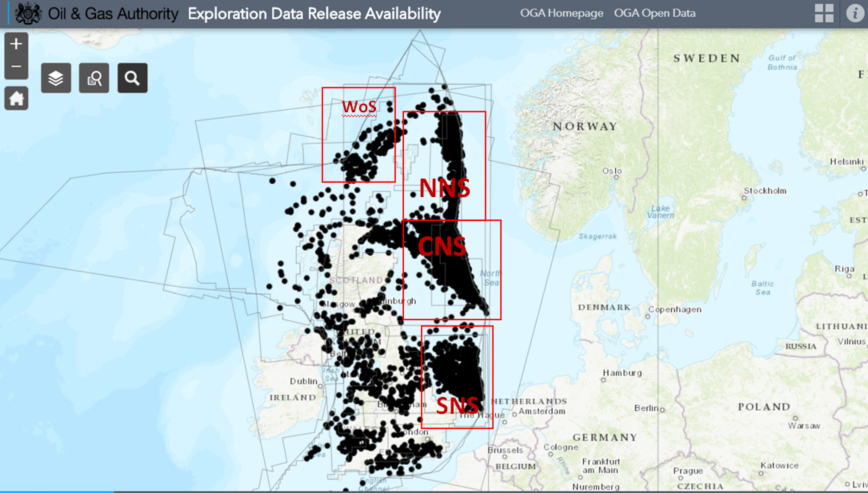

In [42]:
# Decide field location_ offshore or onshore, and field number.
df[['FIELDNAME', 'LOCATION']].groupby('LOCATION').describe()

FIELDNAME                        
             count unique         top freq
LOCATION                                  
Offshore     91748    452       ROUGH  633
Onshore      13259     57  WYTCH FARM  483

In [43]:
# Decide the field area such as northern North Sea (NNS) or Southern North Sea(SNS), or onshore and so on.
df[['FIELDNAME', 'FIELDAREA', 'LOCATION']].groupby('FIELDAREA').describe()

FIELDNAME                              LOCATION                   \
              count unique              top freq    count unique       top   
FIELDAREA                                                                    
CNS           37833    192          FORTIES  525    37833      1  Offshore   
IS             3172     14  SOUTH MORECAMBE  396     3172      1  Offshore   
LAND            483      1       WYTCH FARM  483      483      1   Onshore   
NNS           17145     80            BERYL  517    17145      1  Offshore   
SNS           32489    156            ROUGH  633    32489      1  Offshore   
WoS            1109     10         FOINAVEN  260     1109      1  Offshore   

                  
            freq  
FIELDAREA         
CNS        37833  
IS          3172  
LAND         483  
NNS        17145  
SNS        32489  
WoS         1109

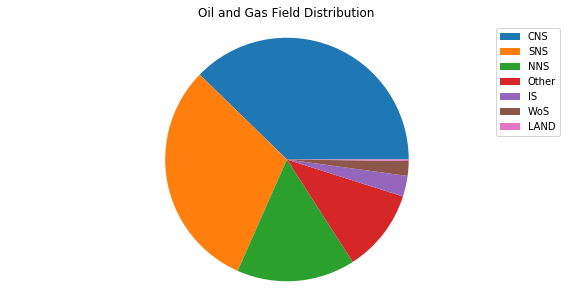

In [44]:
# Create a new field region data frame and make pie chart to visualize field distribution.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

region = pd.DataFrame()

# "Other" represents the fields which have no field area code information in the original dataset. 
region['FIELDAREA'] = ['CNS', 'SNS','NNS','Other', 'IS','WoS','LAND']
region['FIELD_NO'] = [192, 156, 80, 56, 14, 10, 1]
region.set_index('FIELDAREA')

# Plot pie chart for visualize field  distribution.
plt.figure(figsize=(10, 5))
plt.pie(region.FIELD_NO)
plt.axis('equal')
plt.title('Oil and Gas Field Distribution')
plt.legend(region.FIELDAREA)
plt.show()

In [45]:
# Count oil field and gas field number. 
cumulative_prod= df.groupby('FIELDNAME')['OILPRODMBD','DGASPROMMS'].sum()
cumulative_prod['Field_type'] = np.where(cumulative_prod.OILPRODMBD>0, 'Oil', 'Gas')
cumulative_prod
print(cumulative_prod['Field_type'].value_counts())

Oil    326
Gas    183
Name: Field_type, dtype: int64


Next, from the dataset, we can compute the UK annaual oil and gas production from 1975 to 2019. 

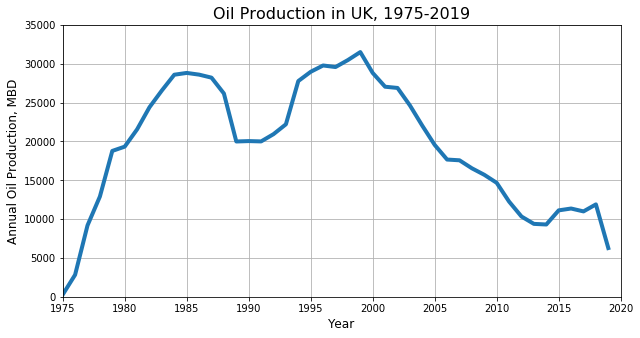

In [46]:
# Compute the UK annual oil production from 1975 to 2019.
annual_oilprod = df.groupby('PERIODYR').OILPRODMBD.sum()
annual_oilprod.plot(figsize=(10,5), linewidth=4)
plt.ylabel('Annual Oil Production, MBD', fontsize=12)
plt.axis([1975, 2020, 0, 35000])
plt.xlabel('Year', fontsize=12)
plt.title('Oil Production in UK, 1975-2019', fontsize=16)
plt.grid(True)
plt.show()

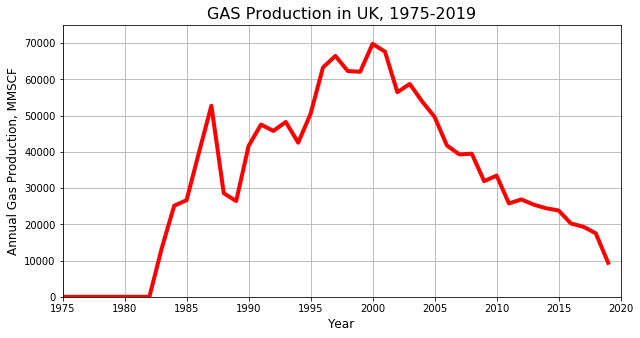

In [47]:
# Compute the UK annual gas production from 1975 to 2019.
annual_gasprod = df.groupby('PERIODYR').DGASPROMMS.sum()
annual_gasprod.plot(color='r', figsize=(10,5), linewidth=4)
plt.ylabel('Annual Gas Production, MMSCF', fontsize=12)
plt.axis([1975, 2020, 0, 75000])
plt.xlabel('Year',fontsize=12)
plt.title('GAS Production in UK, 1975-2019', fontsize=16)
plt.grid(True)
plt.show()

From above the plots, it can be seen that the overall trend of annual oil production for UK oil field during 1975 – 2019 first increased to the peak production about 31500MB at 1999 then start to decline to date. Dry gas fields started to produce gas in 1983, 8 years late than oil production. The trend is similar to oil, first increase then decrease. And the largest gas production of about 70000MMScf was obtained in 2000. Total oil production from 1975 to 2019 is about 882 MMB, and offshore fields produce most of oil about 864 MMB (up to 98%) and onshore produce about 18 MMB (2%). Also up to 99% gas production has been produced from the offshore fields.

In [48]:
# Calculate the total oil production, offshore and onshore oil prodution.
print('Total Oil Production = ', df.OILPRODMBD.sum())
df.groupby('LOCATION').OILPRODMBD.sum()

Total Oil Production =  881818.42695261


LOCATION
Offshore    863638.832967
Onshore      18179.593986
Name: OILPRODMBD, dtype: float64

In [49]:
# Calculate the total gas production, offshore and onshore gas prodution.
print('Total Gas Production = ', df.DGASPROMMS.sum())
df.groupby('LOCATION').DGASPROMMS.sum()

Total Gas Production =  1477870.96307405


LOCATION
Offshore    1.473433e+06
Onshore     4.437708e+03
Name: DGASPROMMS, dtype: float64

Now let’s move on several challenges to this dataset. 

## Analytical Questions:

### 1.	What types of oil production has been produced for the entire field region? Is it light oil or heavy oil? Is oil types    related to oil price or enhanced oil recovery (EOR) method?

let's check oil density or API gravity (can be converted from oil density). 

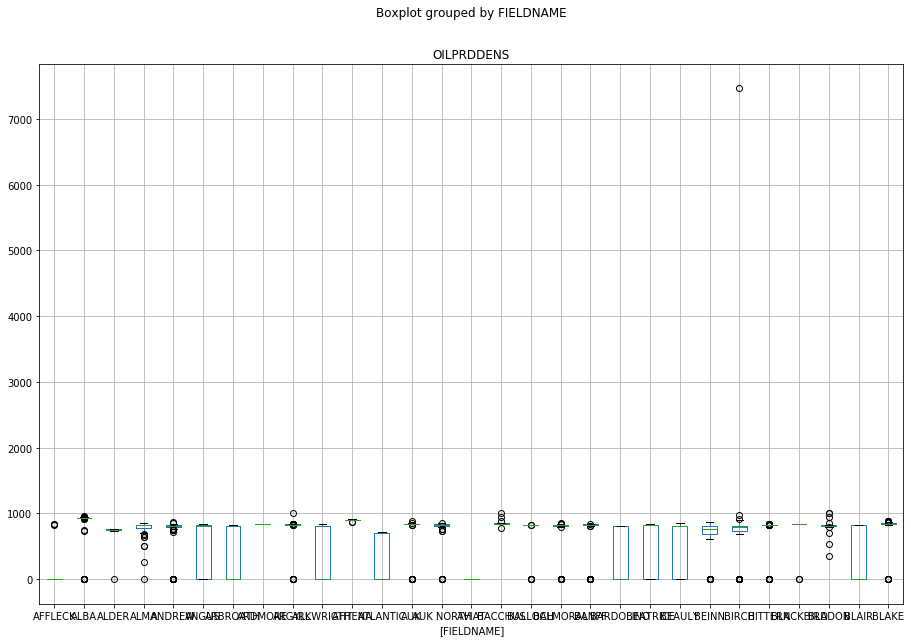

In [50]:
# Load the data and examine oil density for the all the fields.
# Plot it as boxpot.
df[['FIELDNAME','OILPRDDENS']].groupby('FIELDNAME').describe()

# Use the first 5000 data to provide the interpretation. Other data are similar to the first 5000.
df[['FIELDNAME','OILPRDDENS']].head(5000).boxplot(by='FIELDNAME', figsize=(15,10))

The above python codes and plot shown here were used first 5000 data point as an example because the whole dataset has lot of data points and so ghastly large that it's likely impossible to see all of it on a monitor at once. The result of whole dataset is similar to these 5000 data points. From the density plot, it is obviously seen that there is an exceptional outlier there. The value of density is above 7000kg/m3. This value is obviously not true for crude oil. Also check that field’s  (name: BIRCH) original data, it can be seen that this value might be typing error either from the field report or from people who are making this dataset.

The average oil density for the entire field is about from 820 to 950 kg/m3 and converts to API about 20~40°. From wiki (https://en.wikipedia.org/wiki/API_gravity), it is said “Light crude oil has an API gravity higher than 31.1° (i.e., less than 870 kg/m3); Medium oil between 22.3 and 31.1° (i.e., 870 to 920 kg/m3); Heavy crude oil below 22.3° (i.e., 920 to 1000 kg/m3)”. Hence, this oil density data prove that most of the field crude oil production is light oil to medium oil. 

Oil density or API gravity is a very important parameter for the oil field. Density is an integral part of determining the value of oil.  In general, lighter crude commands a higher price because it contains more hydrocarbon chains that can be easily refined to make gasoline and diesel, which are in high demand (Reference: http://www.petroleum.co.uk/classification).  Further, identification of oil density and classification light oil or heavy oil is also related to the application method for enhanced oil recovery (EOR) in the oil field. For example, thermal EOR techniques such as steamflooding instead of waterflood would be applied to heavy oil reservoirs because of high viscosity of oil. And for this dataset oil field, oils are lighter thus water injection was utilized for all the oil fields as shown in the data file. 

### 2. How the field size or number changed over time? And what is the reason behind?

Let's first take a look about UK oil and gas field history. This dataset illustrates that UK North Sea offshore and onshore fields started to produce oil and gas in the middle of 1975 (June, 1975). “As of date” of this dataset is “6/15/2019”.  Three fields ARGYLL, FORTIES and AUK were first explored in 1975. The first is ARGYLL started on June, second FORTIES started on September, 1975 and, AUK December of 1975. 

In addition, it can be figured out from the plot of cumulative oil production with the oil fields, top 50 fields as an example, FORTIES field has 44 years history still producing oil and as of date it has the largest cumulative oil production of about 90000 MBD. 

In [51]:
# Field history about start production year, field size or number information.
df[['FIELDNAME','PERIODYR']].groupby('PERIODYR').describe()

FIELDNAME                           
             count unique            top freq
PERIODYR                                     
1975            12      3         ARGYLL    7
1976            53      7            AUK   12
1977            85      8          BERYL   12
1978           113     12          BERYL   12
1979           157     15          BERYL   12
1980           183     16          BERYL   12
1981           212     18          BERYL   12
1982           237     20          BERYL   12
1983           279     27          BRENT   12
1984           334     32      MURCHISON   12
1985           423     39        DEVERON   12
1986           489     45        DEVERON   12
1987           596     56        THISTLE   12
1988           657     61  CROSBY WARREN   12
1989           770     72       BALMORAL   12
1990           936     91        DEVERON   12
1991          1097     97  WELLAND SOUTH   12
1992          1181    109  WELLAND SOUTH   12
1993          1355    128      PICKERILL   12
1994          1561    140  WELLAND SOUTH   12
1995          1819    167  WELLAND SOUTH   12
1996          2112    192  WELLAND SOUTH   12
1997          2388    211          EIDER   12
1998          2652    233          DRAKE   12
1999          2884    250          DRAKE   12
2000          2993    256          ROUGH   24
2001          3202    276          ROUGH   24
2002          3407    292       HATFIELD   24
2003          3627    306          ROUGH   24
2004          3756    320          ROUGH   24
2005          3841    329       HATFIELD   24
2006          3981    334          ROUGH   24
2007          4138    351          ROUGH   24
2008          4331    369          ROUGH   24
2009          4392    375          ROUGH   24
2010          4458    376          ROUGH   24
2011          4578    390          ROUGH   24
2012          4730    398          ROUGH   24
2013          4851    409          ROUGH   24
2014          4961    415   HUMBLY GROVE   24
2015          4960    420          ROUGH   24
2016          4803    420          ROUGH   24
2017          4661    407   HUMBLY GROVE   24
2018          4611    394       HATFIELD   24
2019          2141    367       HATFIELD   10

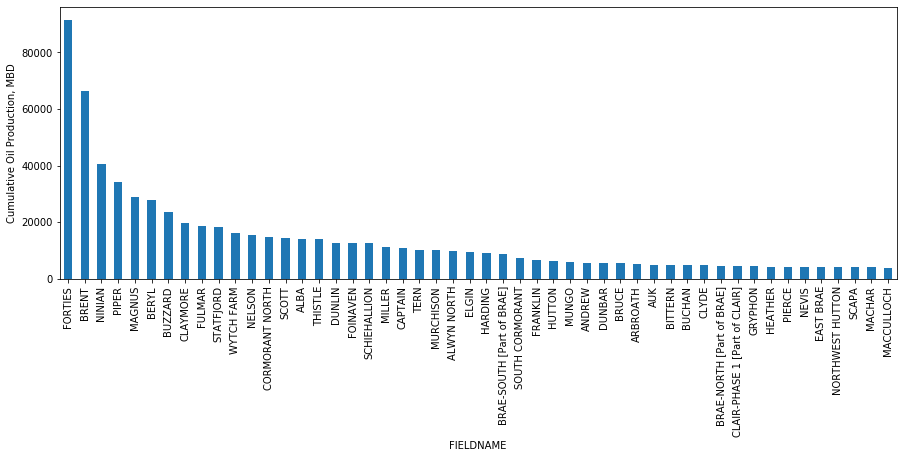

In [52]:
# Plot cumulative oil production for the top 50 fields.
cumulative_oil = df.groupby('FIELDNAME').OILPRODMBD.sum().sort_values(ascending=False)
cumulative_oil.head(50).plot(kind='bar', figsize=(15,5))
plt.ylabel('Cumulative Oil Production, MBD')
plt.show()

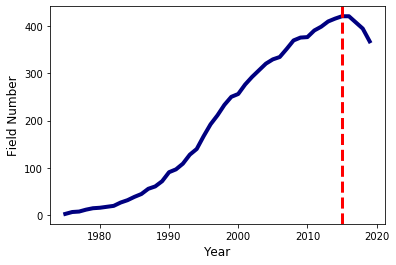

In [53]:
# Loading the Field_Number_Over_Time csv file
# Plotting field number with time
df1 = pd.read_csv('C:/Users/yuluc/OneDrive/Documents/Thinkful/Capstone1/Field_Number_Over_Time.csv')

plt.plot(df1['PERIODYR'], df1['FIELDNUMBER'], color='navy', linewidth=4)
plt.ylabel('Field Number', fontsize=12)
plt.xlabel('Year', fontsize=12)

# Add a vertical line at 2015.
plt.axvline(2015, color='red', linestyle='--', lw=3)

plt.show()

To 2015, the field size showed an ascending trend and field number started from 3 for the beginning year of 1975 increasing to the maximum value of 420 in 2015. This indicates that more and more oil fields including offshore and onshore have been discovered and produced. Now let’s divide 40 years (1975-2015) into 2 sections, first 15 years (1975-1990), second 25 years (1991-2015) to investigate the causes of an increase of the field size. 

First, it is believed that marketing-driven supply and demand has a major impact on the global oil and gas industry. Tighten supply and growing demand for oil and gas production stimulates producer to access reserves of oil and gas from low-permeability geological formations that were previously too expensive to extract and increase investment in oil and gas producing region. This can be proved by Crude oil Prices – 70 Year Historical Chart obtained online as shown in below (https://www.macrotrends.net/1369/crude-oil-price-history-chart). From 1970 to 1990, oil price was increased and reached the peak in 1980, then a little bit declined to 1990.  And another oil price peak was around 2008 and 2009. Growing demand also gives the chance to UK oil and gas industry to explore more oil and gas field. 
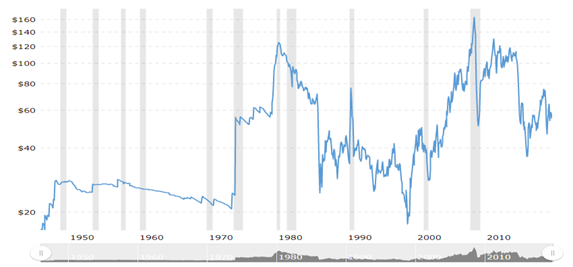

Another very important factor is the tech-driven for oil and gas industry. New advance and cutting-edge technologies help oil and gas companies both extract oil and gas from harder-to-reach places and get more fuel from existing sites. For this dataset, the first 15 years, the average increased rate of field number is about 6 (=91/15) per year and about 13 (= (420-91)/25) for second 25 years showing the double size of the first 15 years. This indicates advance technologies such as deepwater drilling, horizontal wells drilling, hydraulic fracturing, which are developed and evolved well in the late of 1980s or in the beginning of 1990s, have enabled the exploration of more production fields. The UK oil and gas industry is widely regarded as a technology leader in subsea operations and deep water experience (https://oilandgasuk.co.uk/innovator/).

Then a decline trend appeared since 2016 to date. No any new fields were developed. On the contrary, as of date of 2019, 53 fields have been closed down compared with year of 2015. This again implies the marketing-driven effect because after 2015 oil price decreased too much as shown in the price history.

### 3. What are the oil and gas production distributions? What are the main drive mechanisms for the oil production field?

For this section, first let’s check the cumulative oil production and plot oil production with field name for the top 50 fields. It can be figured out from the plot that the first oil production field is Forties. Offshore Forties field as mentioned in previous section has a very long (about 44 years) producing history and it still continues to produce oil and gas. It has relatively high cumulative oil production compared with other fields. 

This dataset has 509 production fields. In order to clearly visualize data and provide more information and deeper insight, the top 10 oil fields data are chosen and plotted to perform decline curve analysis. Note the period date format is inconsistent. Some fields have no either ascending or descending time sequence. Hence, first it is necessary to sort all fields producing time as ascending.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Choose top 10 oil production fields data from the entire dataset based on above information as examples.
# Format period date to pandas date time.
df['PERIODDATE'] = pd.to_datetime(df['PERIODDATE'])

df_forties = df[df.FIELDNAME.isin(['FORTIES'])].sort_values('PERIODDATE')
df_brent = df[df.FIELDNAME.isin(['BRENT'])].sort_values('PERIODDATE')
df_ninian = df[df.FIELDNAME.isin(['NINIAN'])].sort_values('PERIODDATE')
df_piper = df[df.FIELDNAME.isin(['PIPER'])].sort_values('PERIODDATE')
df_magnus = df[df.FIELDNAME.isin(['MAGNUS'])].sort_values('PERIODDATE')
df_beryl = df[df.FIELDNAME.isin(['BERYL'])].sort_values('PERIODDATE')
df_buzzard = df[df.FIELDNAME.isin(['BUZZARD'])].sort_values('PERIODDATE')
df_claymore = df[df.FIELDNAME.isin(['CLAYMORE'])].sort_values('PERIODDATE')
df_fulmar = df[df.FIELDNAME.isin(['FULMAR'])].sort_values('PERIODDATE')
df_statfjord = df[df.FIELDNAME.isin(['STATFJORD'])].sort_values('PERIODDATE')
df_nelson = df[df.FIELDNAME.isin(['NELSON '])].sort_values('PERIODDATE')
df_wytchfarm = df[df.FIELDNAME.isin(['WYTCH FARM'])].sort_values('PERIODDATE')

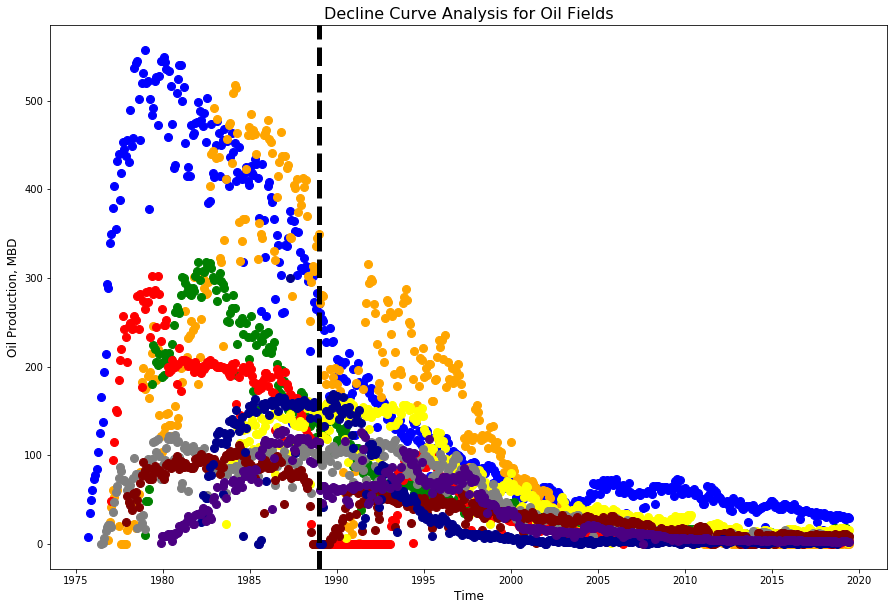

In [55]:
# Plot oil production over time for top 10 field.
# Tentatively discuss drive mechanisms for the oil prodution.
plt.figure(figsize=(15,10))
plt.plot(df_forties['PERIODDATE'], df_forties['OILPRODMBD'],'o', color='blue', markersize=8)
plt.plot(df_brent['PERIODDATE'], df_brent['OILPRODMBD'], 'o', color='orange', markersize=8)
plt.plot(df_ninian['PERIODDATE'], df_ninian['OILPRODMBD'], 'o', color='green', markersize=8)
plt.plot(df_piper['PERIODDATE'], df_piper['OILPRODMBD'], 'o',color='red', markersize=8)
plt.plot(df_magnus['PERIODDATE'], df_magnus['OILPRODMBD'], 'o', color='yellow', markersize=8)
plt.plot(df_beryl['PERIODDATE'], df_beryl['OILPRODMBD'], 'o', color='gray', markersize=8)
plt.plot(df_claymore['PERIODDATE'], df_claymore['OILPRODMBD'], 'o', color='maroon', markersize=8)
plt.plot(df_fulmar['PERIODDATE'], df_fulmar['OILPRODMBD'], 'o', color='darkblue', markersize=8)
plt.plot(df_statfjord['PERIODDATE'], df_statfjord['OILPRODMBD'], 'o',color='indigo', markersize=8)
plt.plot(df_nelson['PERIODDATE'], df_nelson['OILPRODMBD'], 'o', color='coral', markersize=8)

plt.ylabel('Oil Production, MBD', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.title('Decline Curve Analysis for Oil Fields', fontsize=16)

# Add a vertical line at time about 1989-01-01.
plt.axvline(pd.to_datetime('1989-01-01'), color='black', linestyle='--', lw=5)

plt.show()

It can be seen from the above figure that all 10 fields data show a similar trend. And the figure obviously illustrates the right-skewed feature. A black dash line has been drawn in the plot and divided the plot into two sides: left side called primary oil recovery period; right side secondary oil recovery or even tertiary oil recovery period. The detailed information of primary, secondary and tertiary oil recovery is not described here can be referred to PetroWiki (https://petrowiki.org/Primary_drive_mechanisms) or other websites (https://www.petro-online.com/news/fuel-for-thought/13/breaking-news/what-is-the-difference-between-primary-secondary-amp-enhanced-recovery-for-oil-extraction/31405). Simply to say here, primary recovery is driven by the natural energy available to the reservoir. Secondary recovery and tertiary recovery, energy is provided either by injecting water (secondary) or by gas /chemicals (tertiary) into the reservoirs to drive oil and gas. 

Further, primary period looks like a head which oil production very quick approaches the peak and then start to decline as displayed in the graph. Second period (in this project most mean water injection) is like a tail which more oil has been produced for long time. This decline trend is very typical for oil field and the oil production analysis is called “decline curve analysis”.

Next, oil, associated gas, water production and associated gas oil ratio for Forties field are plotted here to further examine data. Gas production has a similar trend as oil. Water production is clearly increased for all the time. The water originally from the field but after the field started water injection, water production partially from the injecting water.

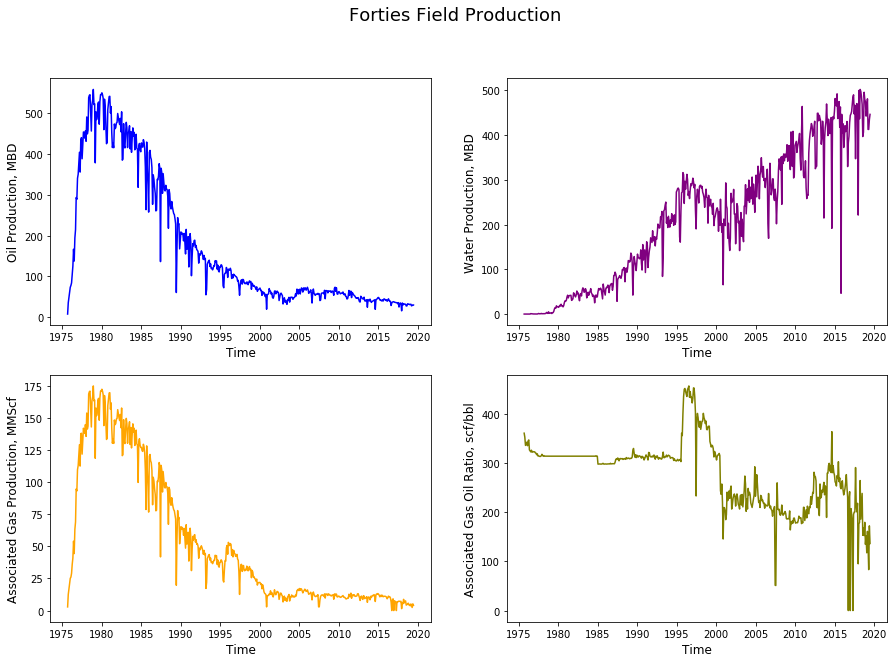

In [56]:
# Subplot for FORTIES field production.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
plt.suptitle('Forties Field Production', fontsize=18)

plt.subplot(2, 2, 1)
plt.plot(df_forties['PERIODDATE'], df_forties ['OILPRODMBD'], color='blue')
plt.ylabel('Oil Production, MBD',fontsize=12)
plt.xlabel('Time', fontsize=12)

plt.subplot(2, 2, 2)
plt.plot(df_forties['PERIODDATE'], df_forties['WATPRODMBD'], color='purple')
plt.ylabel('Water Production, MBD', fontsize=12)
plt.xlabel('Time', fontsize=12)

plt.subplot(2, 2, 3)
plt.plot(df_forties['PERIODDATE'], df_forties['AGASPROMMS'], color='orange')
plt.ylabel('Associated Gas Production, MMScf',fontsize=12)
plt.xlabel('Time', fontsize=12)

gas_oil_ratio = df_forties['AGASPROMMS']*1000/df_forties['OILPRODMBD']
plt.subplot(2, 2, 4)
plt.plot(df_forties['PERIODDATE'], gas_oil_ratio, color='olive')
plt.ylabel('Associated Gas Oil Ratio, scf/bbl', fontsize=12)
plt.xlabel('Time', fontsize=12)

plt.show()

The last plot is the Forties field oil production and water injection over time to further discuss drive mechanism of primary and secondary oil recovery. Forties field water injection for improved oil recovery started on January, 1988. From the plot, it can be concluded that if no water injection, the oil production might stop around the year of 1997 based on the rough decline rate (shown as the black trend line in the graph). However, when the field was applied water injection, reservoir pressure has been maintained and the field still can continue to produce oil to present date.

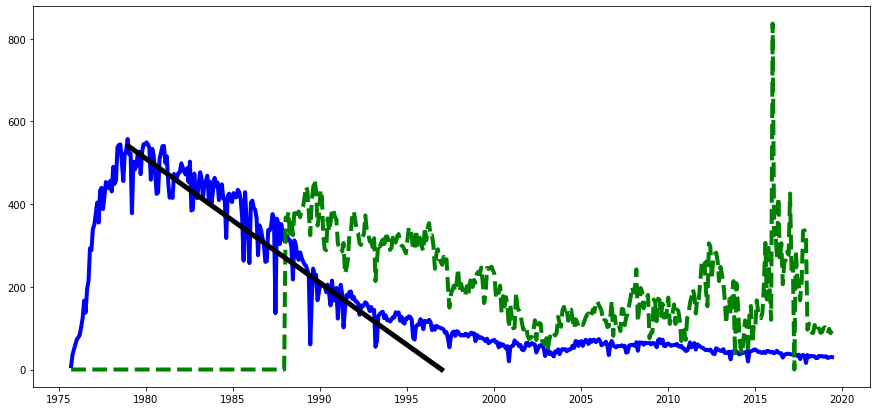

In [57]:
# Plot Forties field oilproduction and injecting water over time.
# Further discuss drive mechanisms for primary and secondary recovery.
plt.figure(figsize=(15,7))
plt.plot(df_forties['PERIODDATE'], df_forties ['OILPRODMBD'], 'b', linewidth=4)
plt.plot(df_forties['PERIODDATE'], df_forties ['INJWATMBD'], 'g--', linewidth=4)

# Add a trend line to investigate the impact of decline rate on oil production. 
plt.plot([pd.to_datetime('1979-01-01'), pd.to_datetime('1997-01-01')], [540, 0], color='black', lw=5)
plt.show()

## Conclusions:
1.	Up to 98% oil and gas production is from UK North Sea offshore fields. Most offshore and onshore oil fields produce light to medium crude oil.
2.	Marketing-driven and tech-driven have a main impact on the global oil and gas industry to explore more oil and gas fields.
3.	Oil production shows a decline trend. Primary pressure depletion and secondary water injection are main drive mechanisms for the UK oil fields.

## Future Work:

Performing history match for the past production data and conducting future oil production or ultimate recovery forecast play very important role in oil and gas industry.  For example, above Forties field oil production, for the tail side from 1990 to date 2019, if we perform history match by using exponential or hyperbolic or other functions, we can obtain a mathematical formula. Then we use this formula to extrapolate the graph to the future and we can get another 20 years (2020-2040 as an instance) oil production. In addition, through decline curve analysis and history matching performance, decline rate can be use to interpret different production drivers as well as drainage pattern and thus optimize water flooding design or field develop plans.

Therefore, the future work for this project will be focus on conducting history match for UK oil fields. Then build a mathematical model and perform oil production forecast and field reserve prediction. It is believed that machine learning including data modeling and regression could help for performing decline curve analysis, history match and production as well as reserve prediction.